# MRI Images

Updated: 2020-05-27

This notebook provides brief instruction describing how to read MRI images with Python and exercise materials.

## Introduction

MRI images are typically saved in **NIfTI-1** format.
The file extension is `.nii` (uncompressed) or `.nii.gz` (gzipped).
A single NIfTI-1 file can contains either 3-D (spatial) or 4-D (spatial + temporal) MRI image.

More information:

- <https://nifti.nimh.nih.gov/nifti-1/>

In [1]:
import nibabel
import numpy as np
import matplotlib.pyplot as plt

## Load NIfTI image

- `nibabel.load` load an NIfTI image as a nibabel image instance.
- To obtain the image as a Numpy array, run `np.asanyarray(<img>.dataobje)`.

### 3-D NIfTI image

First, let's see a 3-D MRI image.

In [2]:
# 3-D image (anatomical MRI image)
img_t1 = nibabel.load('./data/sub-01_t1-anatomy.nii.gz')

data_t1 = np.asanyarray(img_t1.dataobj)
data_t1.shape

(256, 256, 208)

The loaded image should have shape of (256, 256, 208).
The first, second, and third dimensions stand for coronal (anterior-to-posterior), axial (superior-to-inferior), and sagital (left-to-right) axes.
This correspondence differs across images and saved in the NIfTi image file.

#### Terminology on brain anatomy

- Sagital, coronal, axial
- Anterir vs posterior
- Superior vs inferior

<img src="https://users.fmrib.ox.ac.uk/~stuart/thesis/chapter_3/image3_5.gif" width=800px>

<img src="http://2.bp.blogspot.com/-XPtNSJi3aPY/VAlNvjPL_4I/AAAAAAAAEII/8H0ltumAE8U/s1600/brain%2Btilt%2Bhead.png" width=800px>

Images refs:

- https://users.fmrib.ox.ac.uk/~stuart/thesis/chapter_3/section3_2.html
- "Neuroscience, 4th ed." Sinauer, 2007

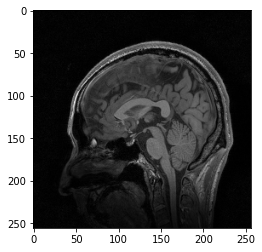

In [3]:
# Visualize the middle sagital plane
plt.imshow(data_t1[:, :, data_t1.shape[2] // 2].T, cmap='gray')

---
**Exercise 1**

Visualize axial and coronal planes of the loaded image.

In [ ]:
# Write code here

---

### 4-D NIfTI image

Next, let's take a look at a 4-D MRI image.

In [4]:
# 4D image (functional MRI image)
img_fmri = nibabel.load('./data/sub-01_bold-preproc_loc-s01-r01.nii.gz')

data_fmri = np.asanyarray(img_fmri.dataobj)
data_fmri.shape

(54, 59, 51, 100)

The loaded image should have shape of (54, 59, 51, 100).
The first three dimensions are spatial: sagital (left-to-right), coronal (posterior-to-anterior), and axial (inferior-to-superior), respectively.
The fourth is temporal.
This image contains whole brain fMRI data from 100 time points.
The TR was 3 s.
Thus, the image contains brain acvitiy during 300 s.

The image size (i.e., the number of voxels) are much less than the anatomical image we investigated above because the spatil resolution of fMRI images are lower then anatomical images (i.e., the voxel size of the fMRI image is much larger than the anatomical image). In the image we loaded, the voxel size is 3 mm.

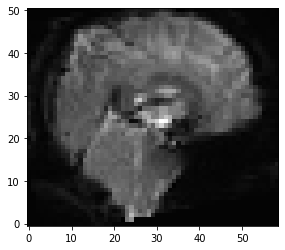

In [5]:
# Sagital plane
plt.imshow(data_fmri[data_fmri.shape[0] // 2, :, :, 0].T, cmap='gray', origin='lower')

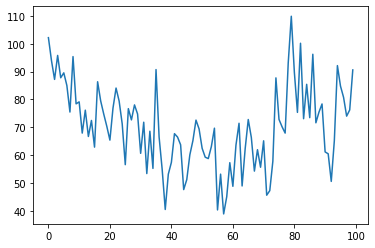

In [6]:
# Time course of a voxel
resp = data_fmri[30, 10, 10, :]
plt.plot(resp)

---
**Exercise 2**

Calculate temporal mean of the fMRI responses of each voxel, and plot the temporal mean as a brain image (in either sagital, coronal, or axial plane).

In [ ]:
# Write code here

data_fmri_mean = 
plt.imshow()

---